In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import pearsonr
import itertools
from statsmodels.tsa.stattools import kpss
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [34]:
train_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
test_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')
oil_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
transaction_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
stores_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
holiday_event_df = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')


#train_df = pd.read_csv('/kaggle/working/traindf_preprocessed.csv')

### 1. Which family is having the highest sales?

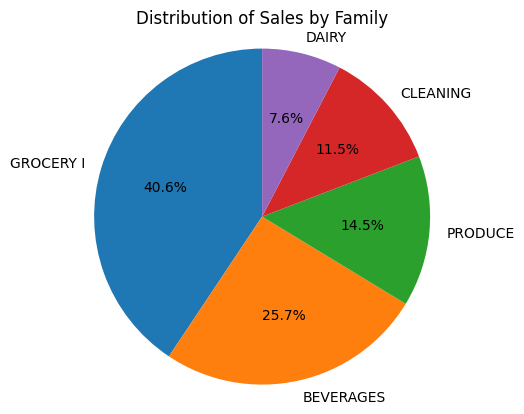

In [35]:
#Performing data grouping by family and calculating the total sales for each family
family_sales = train_df.groupby('family')['sales'].sum()

#Sorting the families based on their sales in descending order
family_sales_sorted = family_sales.sort_values(ascending=False)

#Extracting the top 5 families with the highest sales
top_families = family_sales_sorted.head(5)

#Creating a pie chart to visualize the distribution of sales across the top families
plt.pie(top_families, labels=top_families.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Sales by Family')

plt.axis('equal')
plt.show()

# 2. Analyzing the Impact of Promotion on Sales

In [36]:


### To investigate the question "Does promotion have the ability to improve sales?" the Pearson correlation test will be employed. This statistical test will determine the relationship between the two variables, as they both consist of numerical data. The Pearson correlation coefficient assesses the linear association between two continuous variables and is bounded between -1 and +1.

### H0 (>0.05): The promotion does not have a significant effect on store sales.

### H1 (<0.05): The promotion does have a significant effect on store sales.

In [37]:
correlation, p_value = pearsonr(train_df['onpromotion'], train_df['sales'])

print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.4279232048121857
p-value: 0.0


Based on the Pearson correlation coefficient of 0.4279 and the p-value of 0.0, we can reject the null hypothesis (H0) and conclude that there is a significant relationship between promotion and store sales. Therefore, the promotion does affect store sales.

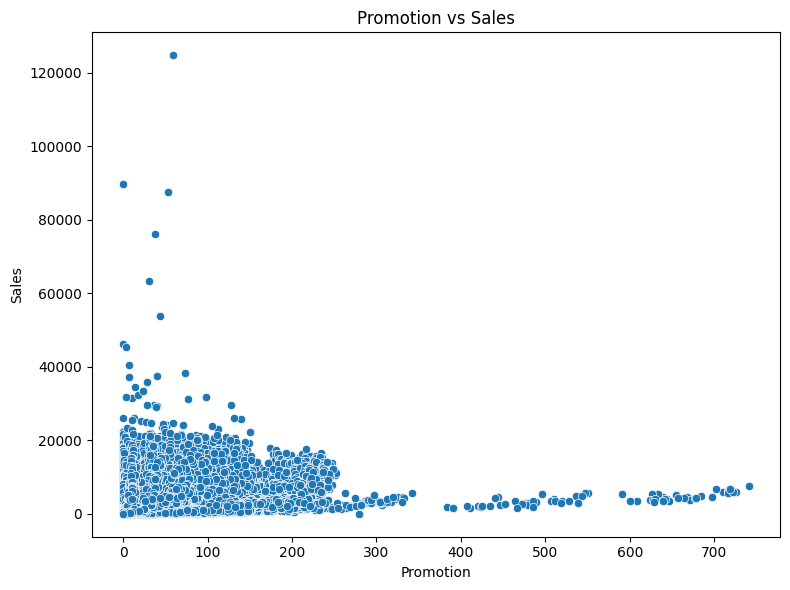

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df['onpromotion'], y=train_df['sales'])
plt.xlabel('Promotion')
plt.ylabel('Sales')
plt.title('Promotion vs Sales')

plt.tight_layout()
plt.show()